## SAGA Paper 4, FIGURE 12:  fgas and vdiff

In [1]:
import numpy as np
from myplotstyle import plt,get_figsize
%matplotlib inline

import matplotlib
import matplotlib.backends.backend_pdf

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H

In [2]:
saga = SAGA.QuickStart()

SAGA `shared_dir` set to /Users/mg37/DropBox/SAGA/
SAGA `local_dir`  set to /Users/mg37/Projects/SAGA/


In [3]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

sats = C.is_sat.filter(base)

In [4]:
# DEFINE QUANTITIES
fgas  = 1.4*10**sats['log_MHI']/(1.4*10**sats['log_MHI']+10**sats['log_sm'])
vdiff = np.abs(sats['DVHOST'])


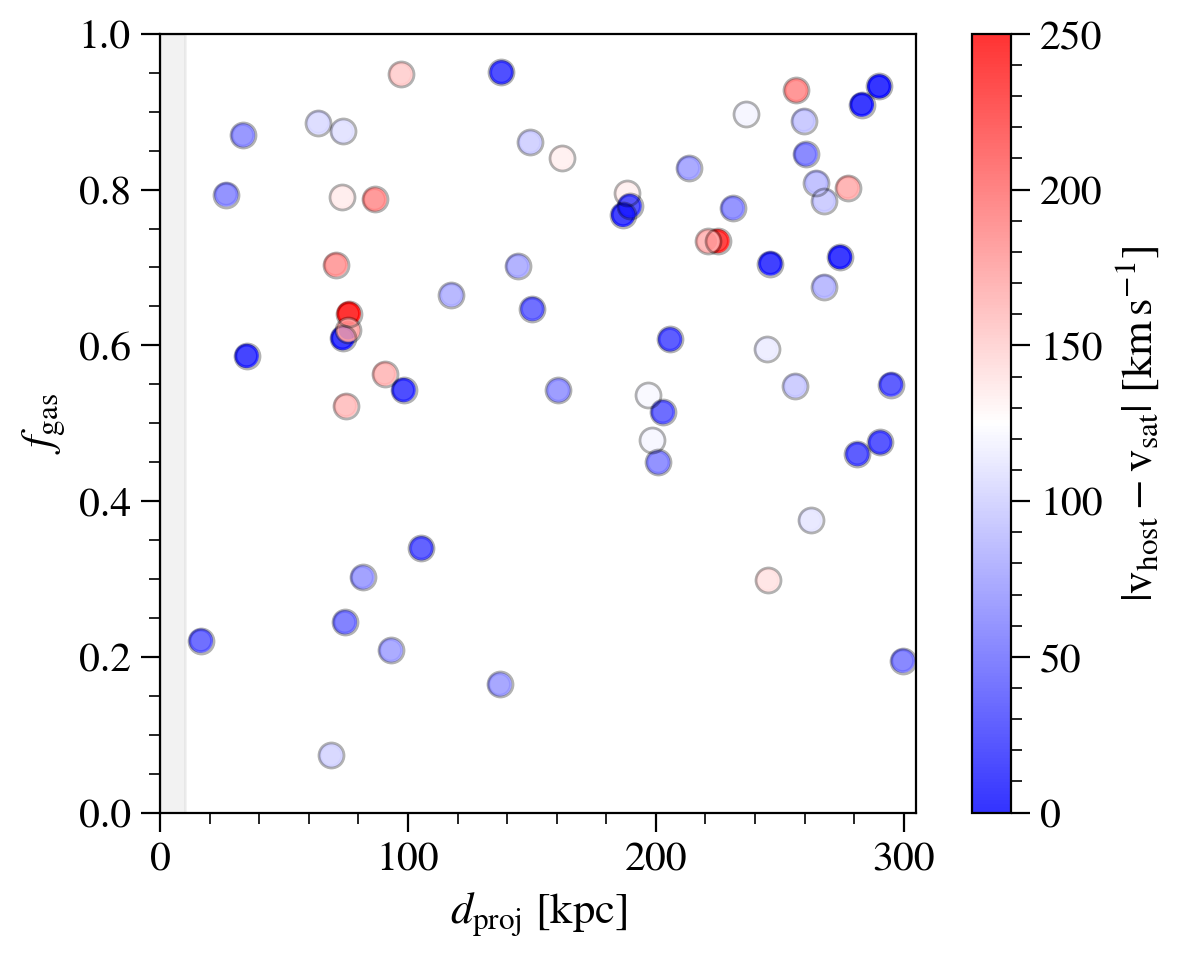

In [5]:
pdf = matplotlib.backends.backend_pdf.PdfPages('figure_vdiff.pdf')
fig, ax1 = plt.subplots(ncols=1, figsize=get_figsize(wide=False, ratio=1.25))

mycmap = 'bwr'
vm = 0
vx = 250

cm = ax1.scatter(sats['RHOST_KPC'],fgas,c=vdiff,alpha=0.8,\
            vmin=vm,vmax=vx,cmap=mycmap,s=60)
ax1.plot(sats['RHOST_KPC'],fgas,'ok',alpha=0.3,mfc='none',ms=9,lw=0.25)


fig.colorbar(cm, label=r'$|{\rm v_{host} - v_{\rm sat}}|~ [{\rm km\,s}^{-1}]$')


ax1.set_ylabel(r'$f_{\rm gas}$')
ax1.set_xlabel(r'$d_{\rm proj}~$[kpc]')

ax1.set_xlim(0,305)
ax1.set_ylim(0,1)
ax1.fill_between([0,10],[0,0],[1,1],color='grey',alpha=0.1)

pdf.savefig()
pdf.close()

## Do some stats

In [6]:
m1 = (sats['HI_FLUX'] > 0) & (sats['log_sm'] > 7.5)
m = fgas > 0.5

print('Gold Mean')
v1 = np.mean(vdiff[m1&m])
v2 = np.mean(vdiff[m1&~m])
verr1 = 60*np.ones(np.sum(m1&m))
verr2 = 60*np.ones(np.sum(m1&~m))

err1 = np.std(vdiff[m1&m], ddof=1) / np.sqrt(np.sum(m1&m))
err2 = np.std(vdiff[m1&~m], ddof=1) / np.sqrt(np.sum(m1&~m))

print('fgas > 0.5:  {:0.2f}'.format(v1))
print('fgas < 0.5:  {:0.2f}'.format(v2))
print('fgas < 0.5:  {:0.2f} +/- {:0.2f}'.format(v1-v2,np.sqrt(err1**2+err2**2)))


Gold Mean
fgas > 0.5:  92.77
fgas < 0.5:  69.31
fgas < 0.5:  23.45 +/- 14.30


In [7]:
m1 = (sats['HI_FLUX'] > 0) & (sats['log_sm'] > 8.5)
m = fgas > 0.5

print('> 8.5 Msun Mean')
v1 = np.mean(vdiff[m1&m])
v2 = np.mean(vdiff[m1&~m])
verr1 = 60*np.ones(np.sum(m1&m))
verr2 = 60*np.ones(np.sum(m1&~m))

err1 = np.std(vdiff[m1&m], ddof=1) / np.sqrt(np.sum(m1&m))
err2 = np.std(vdiff[m1&~m], ddof=1) / np.sqrt(np.sum(m1&~m))

print('fgas > 0.5:  {:0.2f}'.format(v1))
print('fgas < 0.5:  {:0.2f}'.format(v2))
print('fgas < 0.5:  {:0.2f} +/- {:0.2f}'.format(v1-v2,np.sqrt(err1**2+err2**2)))


> 8.5 Msun Mean
fgas > 0.5:  97.69
fgas < 0.5:  66.07
fgas < 0.5:  31.62 +/- 17.67
